In [53]:
library(janitor)
library(ggpubr)
library(tidyverse)
library(knitr)
library(ggplot2)
library(ggsci)
library(knitr)
library(performance)


Attaching package: ‘performance’


The following objects are masked from ‘package:modelr’:

    mae, mse, rmse




In [25]:
setwd(here::here())

In [32]:
# Load all joined dataset
source("./scripts/code_clean_data_soil_moisture.R")
source("./scripts/code_join_data_full_dataset.R")

tibble [1,536 × 7] (S3: tbl_df/tbl/data.frame)
 $ id            : int [1:1536] 5 5 6 6 7 7 8 8 9 9 ...
 $ spcode        : Factor w/ 8 levels "dr","ec","gs",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ treatment     : Factor w/ 4 levels "Ambient Rain",..: 1 1 1 1 1 1 1 1 4 4 ...
 $ nfixer        : Factor w/ 2 levels "fixer","nonfixer": 1 1 1 1 1 1 1 1 1 1 ...
 $ date_day_month: Factor w/ 6 levels "31-August","19-September",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sm_measured   : Factor w/ 2 levels "Before applying the treatments",..: 1 2 1 2 1 2 1 2 1 2 ...
 $ soil_moisture : num [1:1536] 31.5 21.9 25.8 25.4 26.5 25.8 29 22.5 30.3 28.8 ...



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [42]:
# Load custom made functions

## Inference
source("./R/function_for_inference_anova_table.R")
source("./R/function_for_inference_tukey_tables.R")
source("./R/function_for_inference_emmeans_and_percentage_diff.R")



## Plots
source("./R/function_plots.R")
source("./R/function_validation_plots.R")


In [28]:
# set plot dimensions
options(repr.plot.width = 25)
options(repr.plot.height = 10)

__For running each peice of code press shift + Enter__

# Soil moisture figures

In [29]:
data_soil_moisture_cleaned %>%
	group_by(treatment,nfixer,date_day_month,sm_measured ) %>%

	summarise(mean_sm = mean(soil_moisture),
			  sd_sm   = sd(soil_moisture)) %>%

    arrange(nfixer) %>%
	arrange(date_day_month) %>%
	kable()

`summarise()` has grouped output by 'treatment', 'nfixer', 'date_day_month'.
You can override using the `.groups` argument.




|treatment                             |nfixer   |date_day_month |sm_measured                    |   mean_sm|     sd_sm|
|:-------------------------------------|:--------|:--------------|:------------------------------|---------:|---------:|
|Ambient Rain                          |fixer    |31-August      |Before applying the treatments | 33.183333|  5.576384|
|Ambient Rain                          |fixer    |31-August      |After applying the treatments  | 26.541667|  5.094821|
|Ambient Rain plus Nutrients           |fixer    |31-August      |Before applying the treatments | 29.708333|  8.483187|
|Ambient Rain plus Nutrients           |fixer    |31-August      |After applying the treatments  | 23.475000|  9.609477|
|Ambient Rain plus Water               |fixer    |31-August      |Before applying the treatments | 32.533333|  6.689250|
|Ambient Rain plus Water               |fixer    |31-August      |After applying the treatments  | 29.100000|  3.636432|
|Ambient Rain plus Nutrients a

## Boxplots

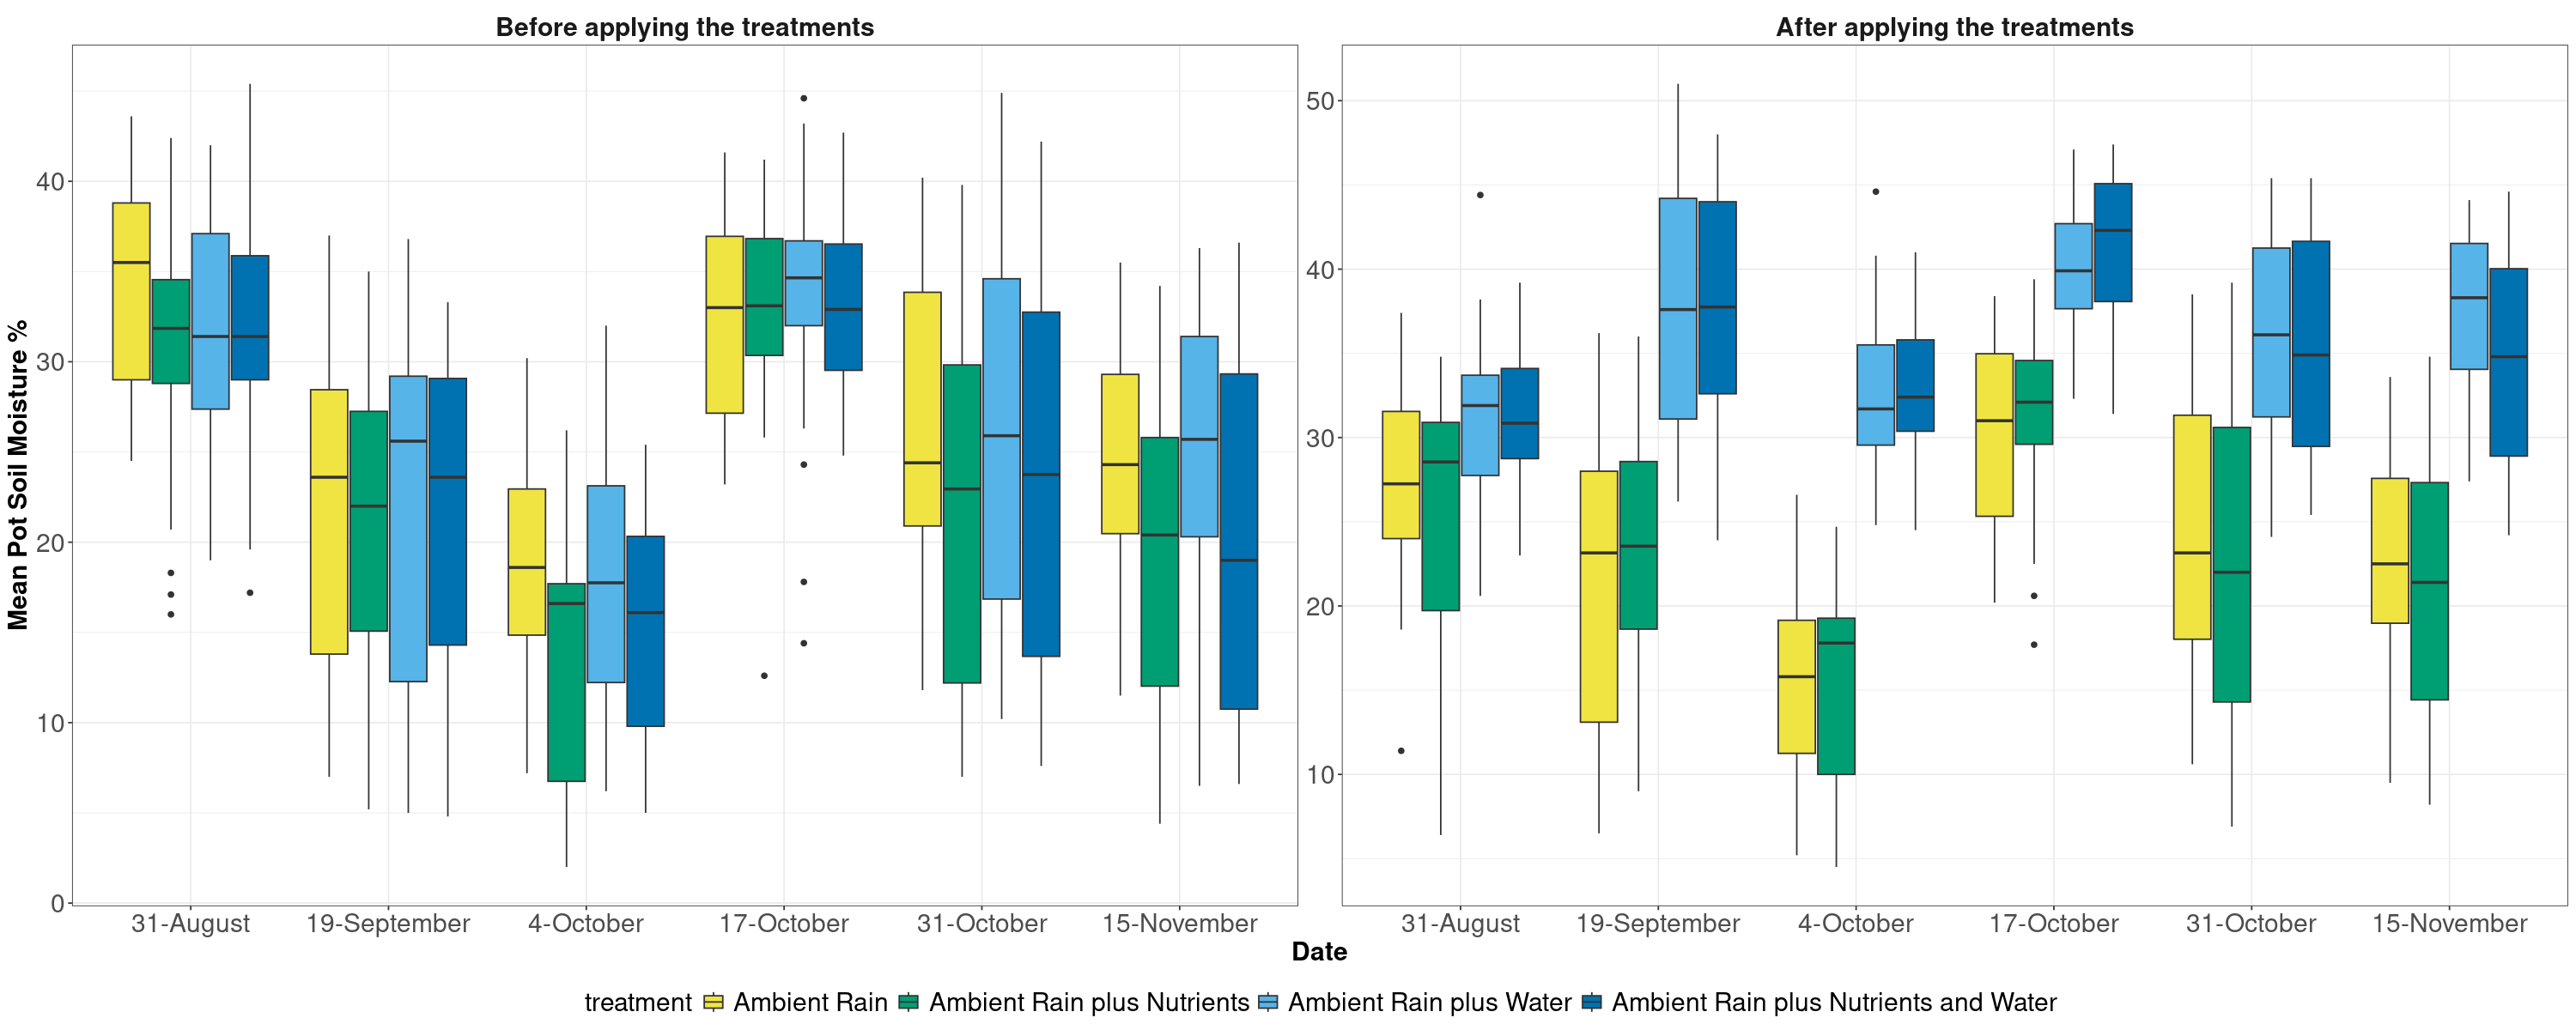

In [30]:
ggplot(data = data_soil_moisture_cleaned,
	   aes(x = date_day_month, y = soil_moisture,
	   	   fill = treatment)) +
	#facet_wrap(~treatment,nrow = 4, scales = "free_y") +

	#Adjust boxplots side by side
	geom_boxplot(position = position_dodge(width=.8)) +
	theme_bw() +

    facet_wrap(~ sm_measured, scales = "free_y") +

	#Define colors
	#scale_colour_manual(values = c("#F0E442","#0072B2"))+
	xlab("Date") + ylab("Mean Pot Soil Moisture %") +

	#Delete lines around facet labels
	theme(strip.background = element_rect( color="white", fill="white"),

     #Font size
     axis.text = element_text(size = 18),
     axis.title = element_text(size = 18,face = "bold"),
     strip.text.x = element_text(size = 18,face = "bold"),

     # Legend position and size
     legend.position = "bottom",
     legend.title = element_text(size = 18),
     legend.text = element_text(size = 18)) +
	 guides(col = guide_legend(ncol = 1,
	 						  title.position = "left",
	 						  title.hjust = .59,
	 						  title = "Soil Moisture Measuared:")
	 	   ) +
    ggplot2::scale_fill_manual(values = c("#F0E442","#009E73",
                                              "#56B4E9","#0072B2"))

## Mean values + Standard errors

In [31]:
data_soil_moisture_cleaned  %>%
        group_by(date_day_month, sm_measured, treatment) %>%
        summarise(mean_soil_moisture = mean(soil_moisture),

                se_soil_moisture = (sd(soil_moisture) / sqrt(n())))  %>%

        mutate(difference = ((mean_soil_moisture - first(mean_soil_moisture)))) %>%
        filter(sm_measured == "After applying the treatments" &
                treatment %in% c("Ambient Rain plus Water",
                                "Ambient Rain plus Nutrients and Water")) %>%
        kable()

`summarise()` has grouped output by 'date_day_month', 'sm_measured'. You can
override using the `.groups` argument.




|date_day_month |sm_measured                   |treatment                             | mean_soil_moisture| se_soil_moisture| difference|
|:--------------|:-----------------------------|:-------------------------------------|------------------:|----------------:|----------:|
|31-August      |After applying the treatments |Ambient Rain plus Water               |           31.26250|        0.9061144|   4.100000|
|31-August      |After applying the treatments |Ambient Rain plus Nutrients and Water |           31.32812|        0.7427911|   4.165625|
|19-September   |After applying the treatments |Ambient Rain plus Water               |           37.69687|        1.2719483|  16.125000|
|19-September   |After applying the treatments |Ambient Rain plus Nutrients and Water |           37.70625|        1.1995626|  16.134375|
|4-October      |After applying the treatments |Ambient Rain plus Water               |           32.71563|        0.8199886|  17.368750|
|4-October      |After applying 

`summarise()` has grouped output by 'date_day_month', 'sm_measured'. You can
override using the `.groups` argument.


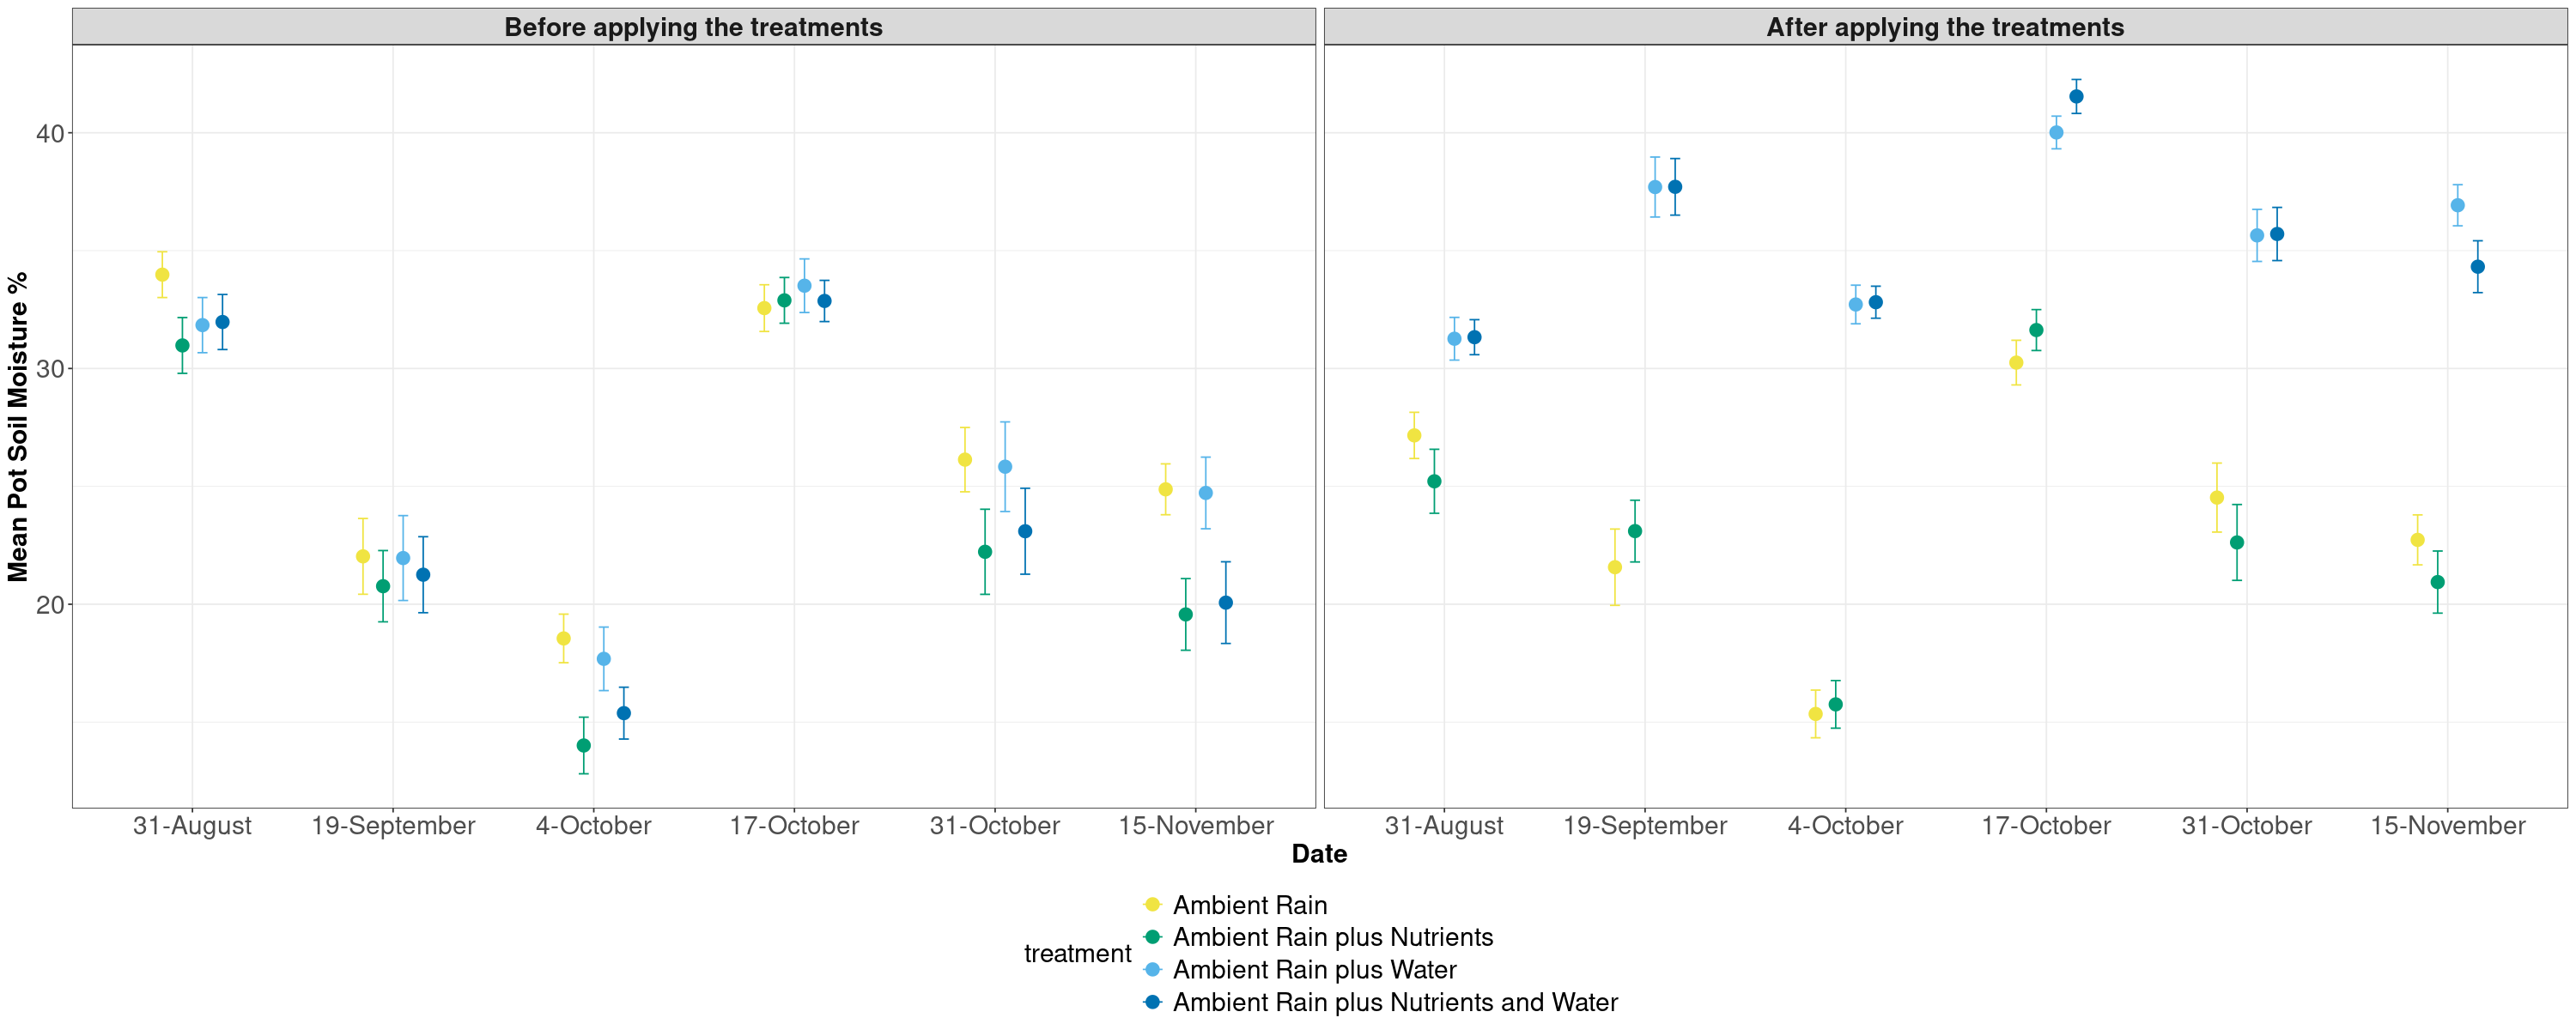

In [23]:
data_soil_moisture_cleaned  %>%
        group_by(date_day_month, sm_measured, treatment) %>%
        summarise(mean_soil_moisture = mean(soil_moisture),

                se_soil_moisture = (sd(soil_moisture) / sqrt(n()))) %>%

        ggplot(data = ., aes(x = date_day_month, y = mean_soil_moisture,
                            color = treatment)) +
            geom_point(position = position_dodge(width = .4), size = 4) +
            facet_wrap(~sm_measured) +

            scale_color_manual(values = c("#F0E442","#009E73", "#56B4E9",
                                            "#0072B2")) +

            xlab("Date") + ylab("Mean Pot Soil Moisture %") +
            theme_bw() +

            # Add Standard error bars
            geom_errorbar(aes(ymin = mean_soil_moisture - se_soil_moisture,
                              ymax = mean_soil_moisture + se_soil_moisture),
                            width = .2,
                            position = position_dodge(width = .4)) +


            #Delete lines around facet labels
	        theme(

                    #Font size
                    axis.text = element_text(size = 18),
                    axis.title = element_text(size = 18, face = "bold"),
                    strip.text.x = element_text(size = 18, face = "bold"),

                    # Legend position and size
                    legend.position = "bottom",
                    legend.title = element_text(size = 18),
                    legend.text = element_text(size = 18)) +
	                guides(col = guide_legend(ncol = 1, title.position = "left",
                            title.hjust = .59))


# Plant's mass fractions figures

In [33]:
data_mass_fractions <-
    data_for_models %>%
    tibble::rownames_to_column("id") %>%
    select(id,spcode, treatment, nfixer, init_height)

## Models

In [35]:
data_for_models <-
  data_for_models %>%

  # Select variables for analysis
  dplyr::select(c(spcode, treatment, nfixer, init_height, rmf, smf, lmf))

In [38]:
# Take response variables names
response_vars_mass_fractions <-
    set_names(c("rmf", "smf", "lmf"))


response_vars_mass_fractions

rmf   smf   lmf 
"rmf" "smf" "lmf"

In [40]:
models_mass_fractions <- map(response_vars_mass_fractions, ~ mixed_model_1(response = .x,
                  data = data_for_models))

names(models_mass_fractions)

[1] "rmf" "smf" "lmf"

## Model Assumptions

### Root Mass fractions

[1] "No variable specified inthe variables argument"


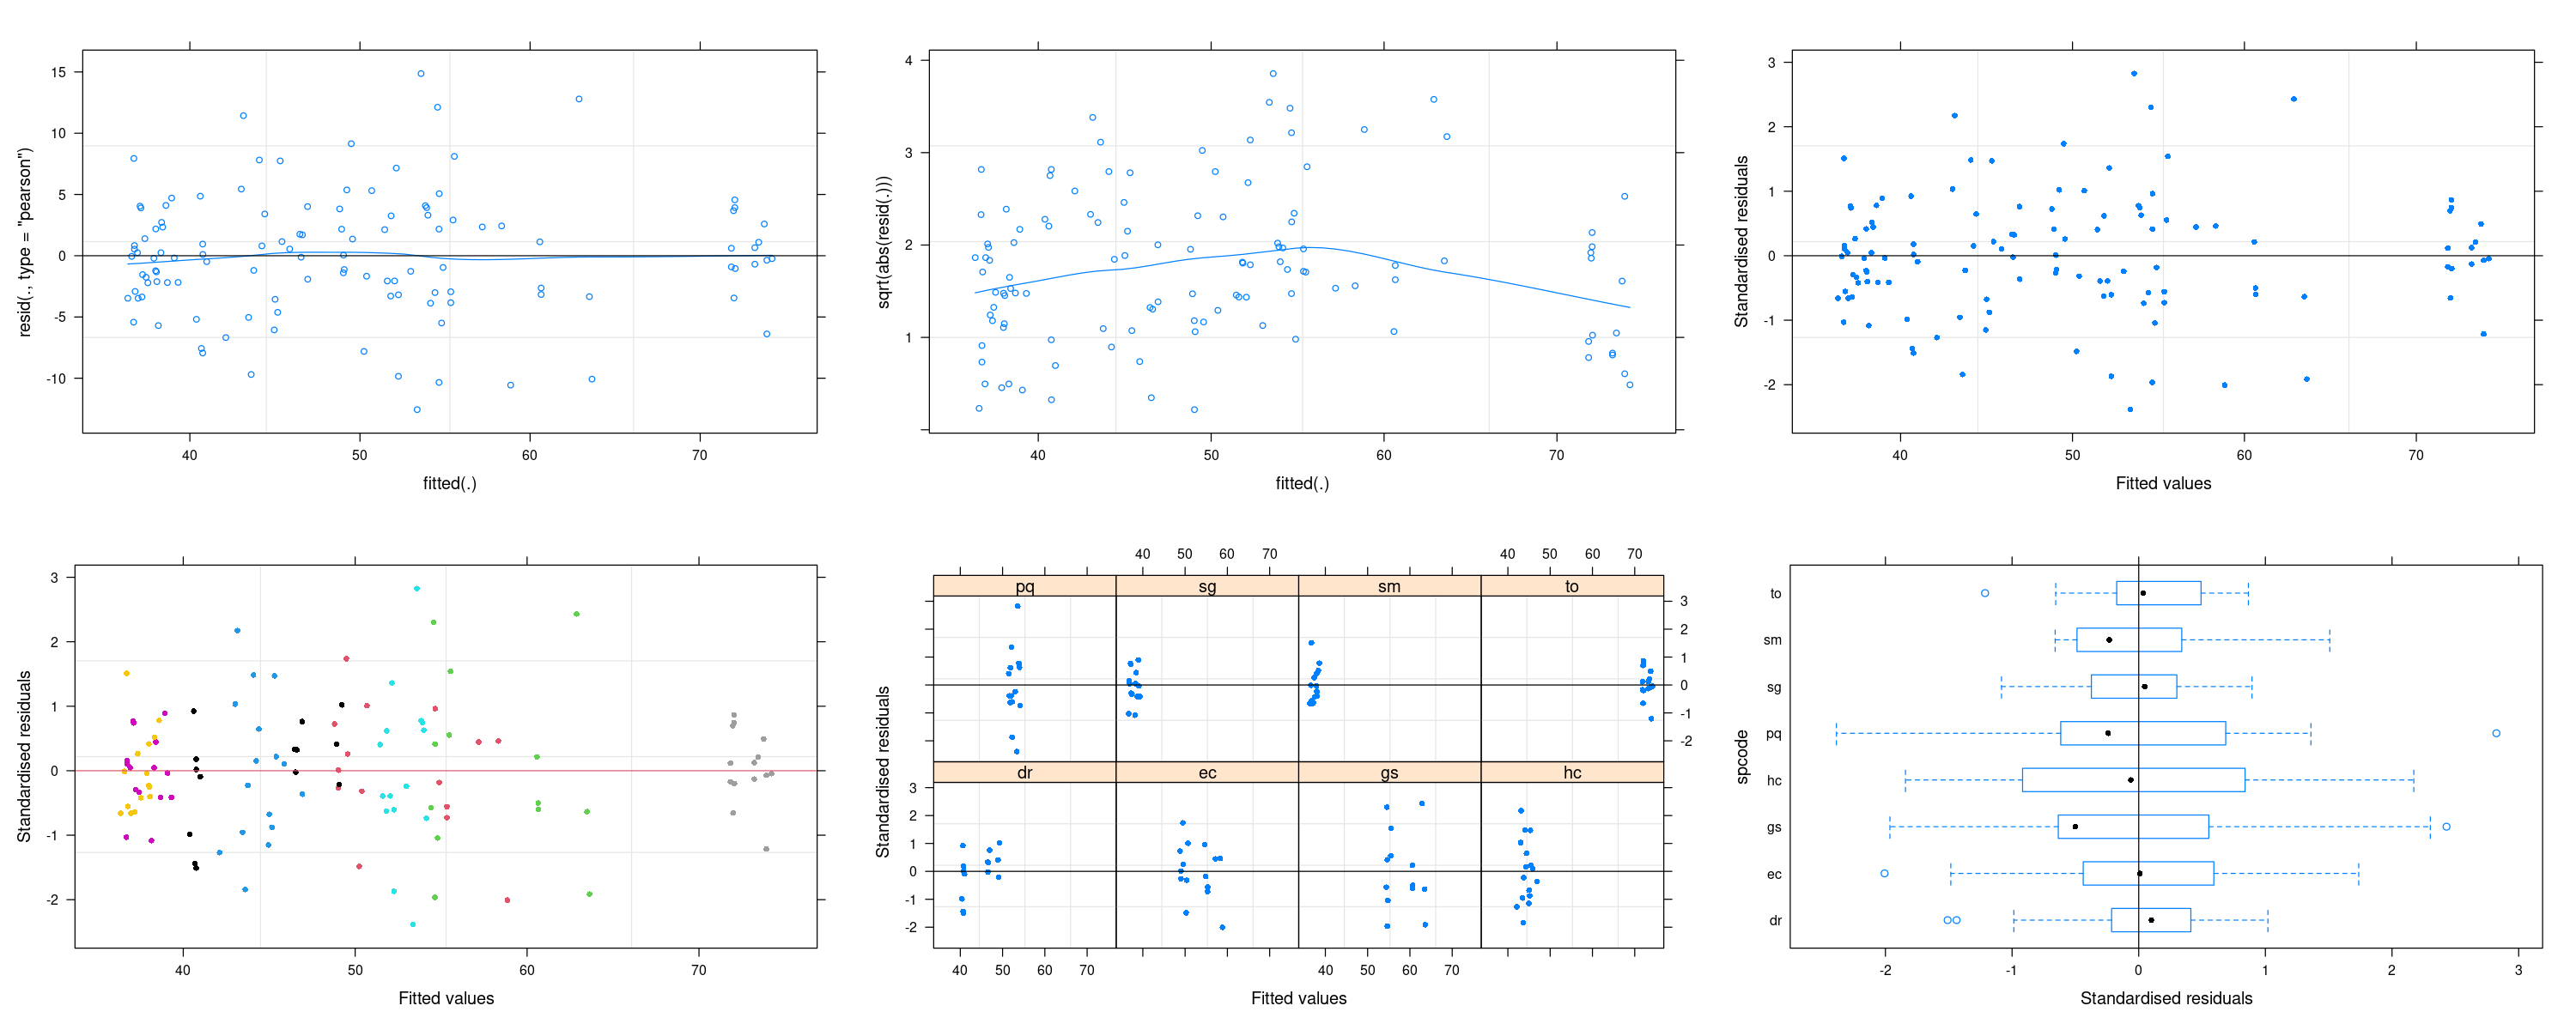

In [43]:
par(mfrow = c(3,3))
validation_plots(models_mass_fractions$rmf,
                data = data_for_models,
                group = "spcode")

### Stem Mass fractions

[1] "No variable specified inthe variables argument"


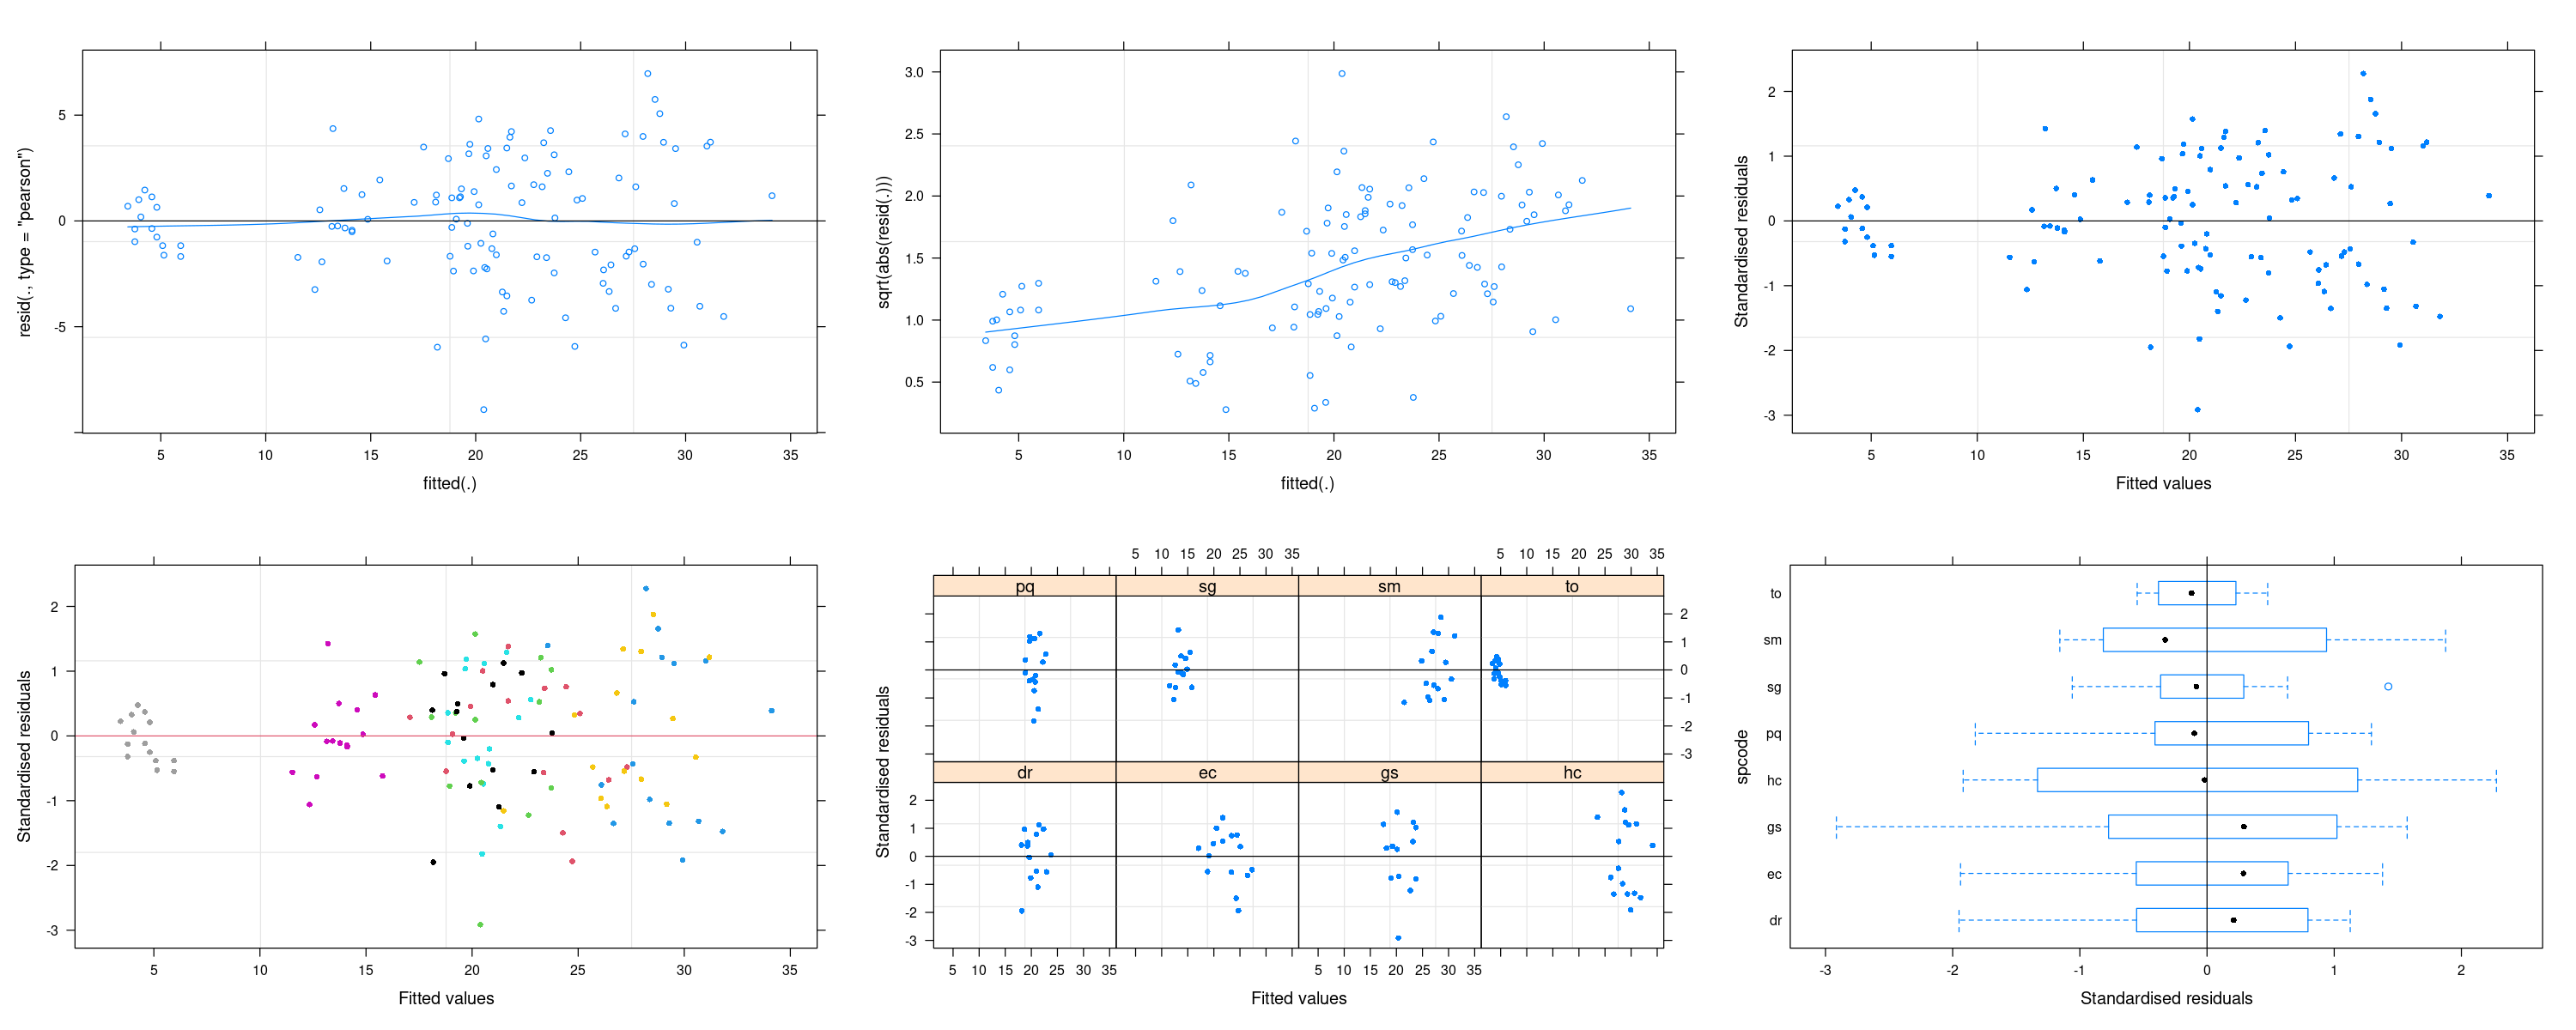

In [45]:
par(mfrow = c(3,3))
validation_plots(models_mass_fractions$smf,
                data = data_for_models,
                group = "spcode")

### Leaf Mass fractions

[1] "No variable specified inthe variables argument"


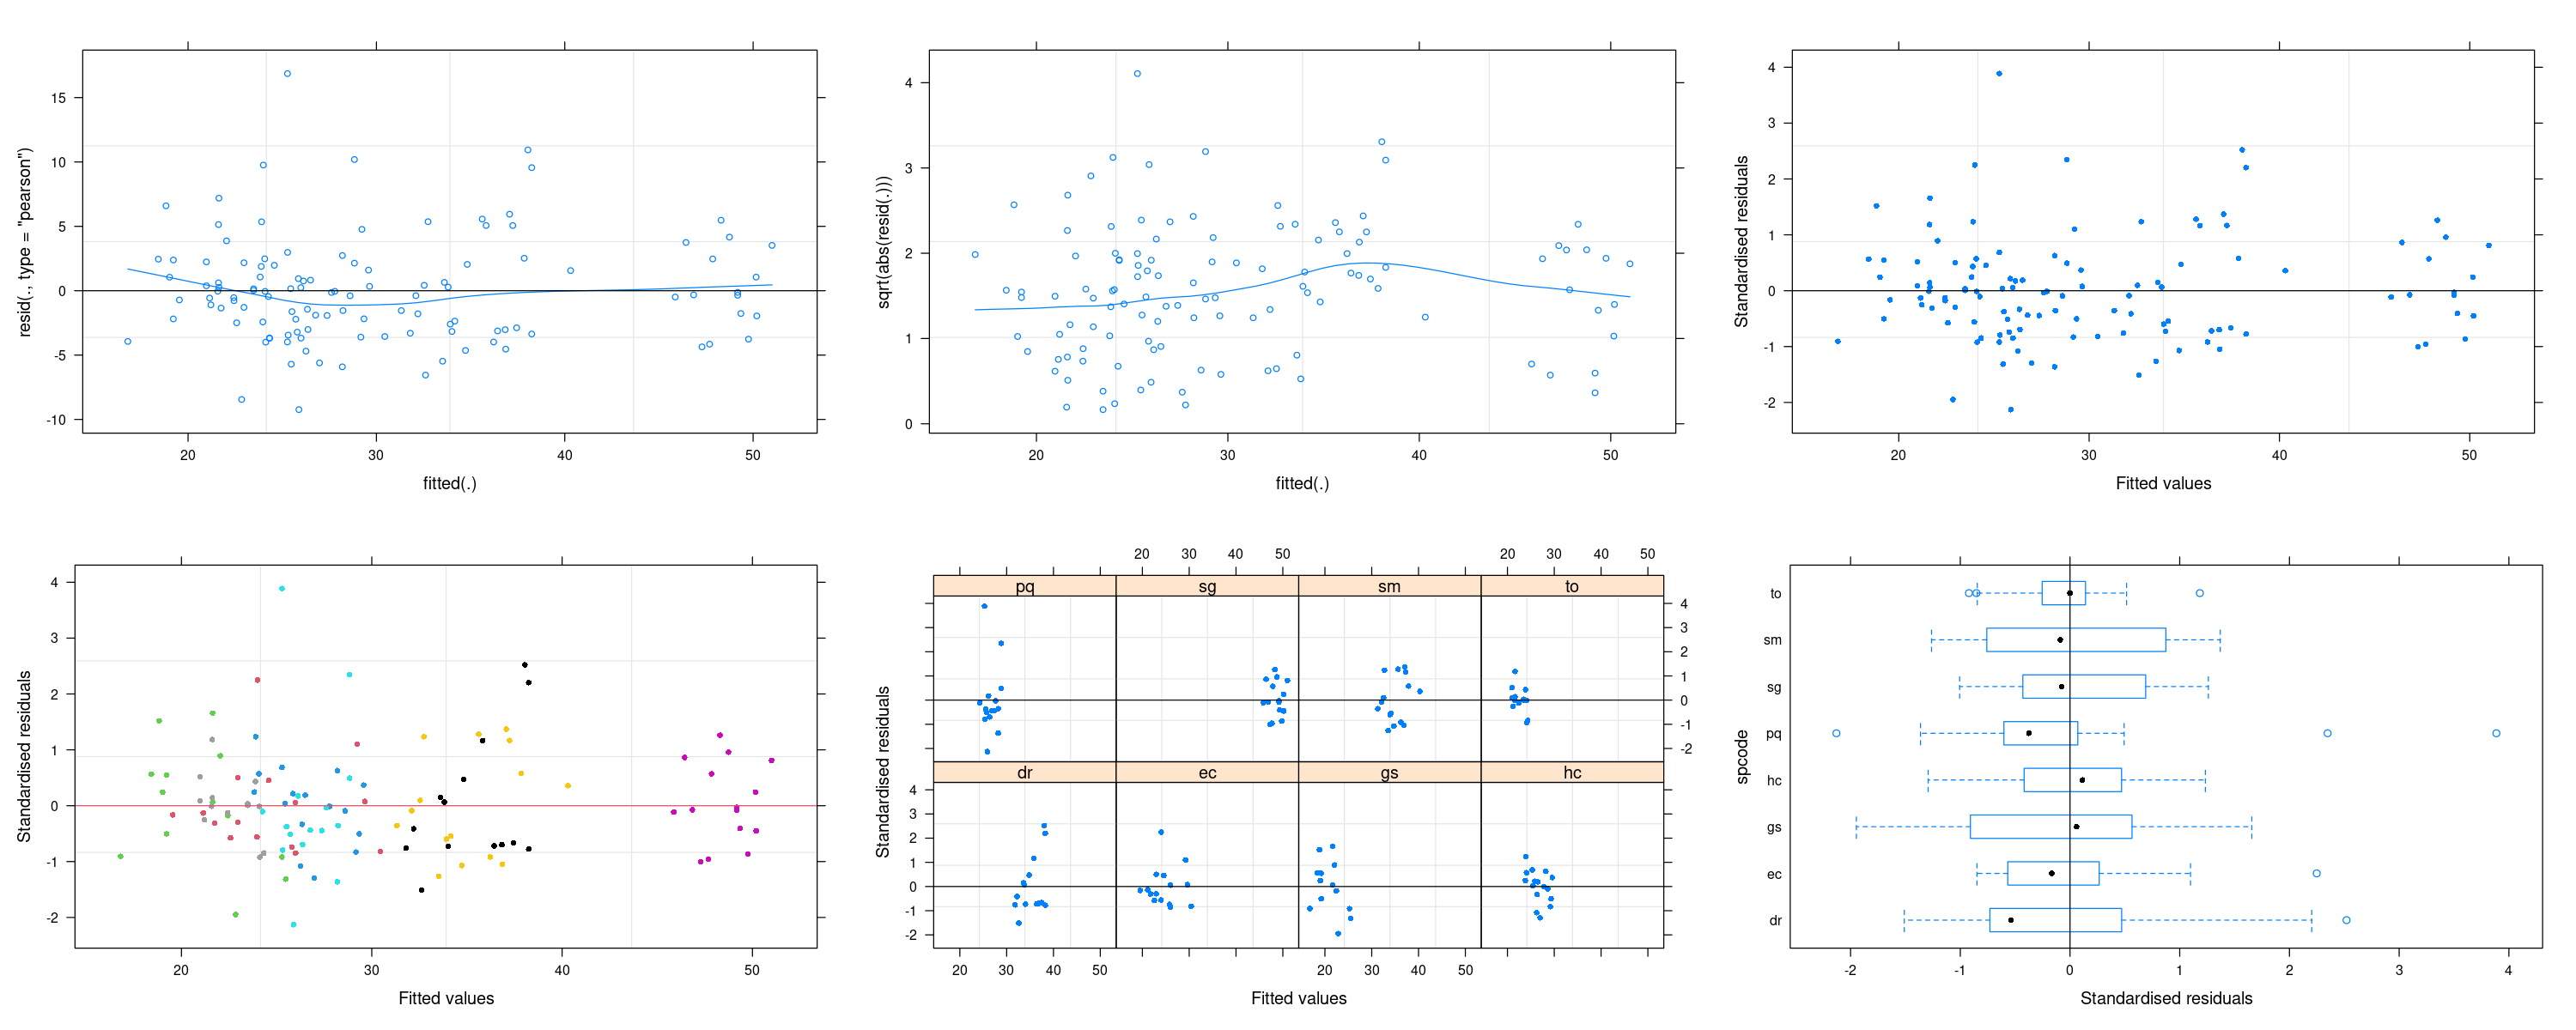

In [46]:
par(mfrow = c(3,3))
validation_plots(models_mass_fractions$lmf,
                data = data_for_models,
                group = "spcode")

## Model inference

In [55]:
## r2 models
models_mass_fractions %>%

    map(., r2) %>%
    unlist() %>%
    kable()



|                                  |         x|
|:---------------------------------|---------:|
|rmf.R2_conditional.Conditional R2 | 0.8544378|
|rmf.R2_marginal.Marginal R2       | 0.0428643|
|smf.R2_conditional.Conditional R2 | 0.8451717|
|smf.R2_marginal.Marginal R2       | 0.3564045|
|lmf.R2_conditional.Conditional R2 | 0.8513074|
|lmf.R2_marginal.Marginal R2       | 0.1445339|

### Anova tables

In [ ]:
map(models_q1, ~Anova(.x, type = "III", test.statistic = c("F")))

### Post-Hoc: Tukey's test

### Root Mass fractions

In [ ]:
as_tibble(emmeans(models_q1$total_biomass,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

### Stem Mass fractions

In [ ]:
as_tibble(emmeans(models_q1$total_biomass,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))

### Leaf Mass fractions

In [ ]:
as_tibble(emmeans(models_q1$total_biomass,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6))